In [1]:
##imports:

from foodCollectModel import FoodModel

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

import numpy as np
import pandas as pd

import time
from IPython import display

import seaborn as sns


In [2]:
##constants:
WIDTH = 20
HEIGHT = 20
COUNT_FOOD = 47
NUM_EXPLORERS = 3
NUM_COLLECTORS = 2
STEPS = 1500


total_steps = 0

In [3]:
##running the model:
model = FoodModel(WIDTH, HEIGHT, NUM_EXPLORERS, NUM_COLLECTORS, COUNT_FOOD)

for i in range(STEPS):
    if model.collected_food < 47:
        model.step()
        total_steps += 1
    else:
        break

print(f"Steps: {total_steps}")

Steps: 1500


In [4]:
##collecting data:
all_grids = model.datacollector.get_model_vars_dataframe()

C:\Users\OlimpiaHelenaGarciaH\AppData\Local\Temp\ipykernel_20620\794751667.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch = plt.imshow(all_grids.iloc[0][0], cmap = plt.cm.binary)
C:\Users\OlimpiaHelenaGarciaH\AppData\Local\Temp\ipykernel_20620\794751667.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch.set_data(all_grids.iloc[frame][0])


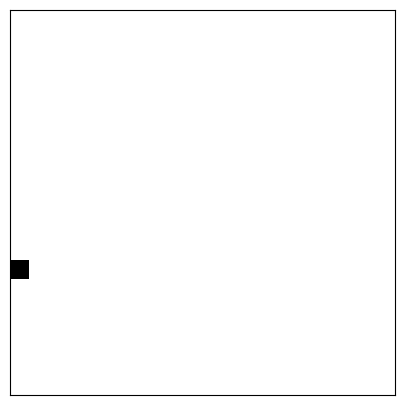

In [5]:
##plotting the model:
fig, axis = plt.subplots(figsize = (5,5))
axis.set_xticks([])
axis.set_yticks([])
patch = plt.imshow(all_grids.iloc[0][0], cmap = plt.cm.binary)

def animate(frame):
    patch.set_data(all_grids.iloc[frame][0])

anim = animation.FuncAnimation(fig, animate, frames = total_steps)

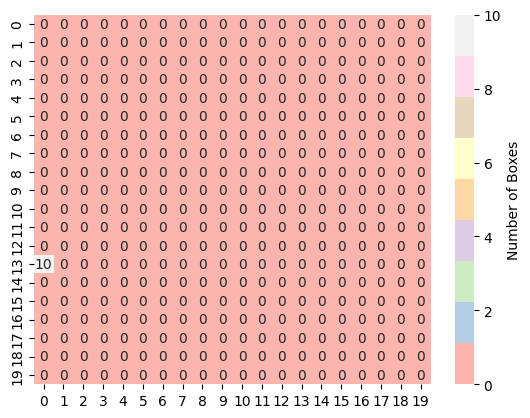

In [6]:
##saving the animation:
sns.heatmap(
    all_grids.iloc[0]["Floor"],
    annot=True, 
    fmt="g", cmap="Pastel1", 
    cbar_kws={"label": "Number of Boxes"}
)

plt.show()

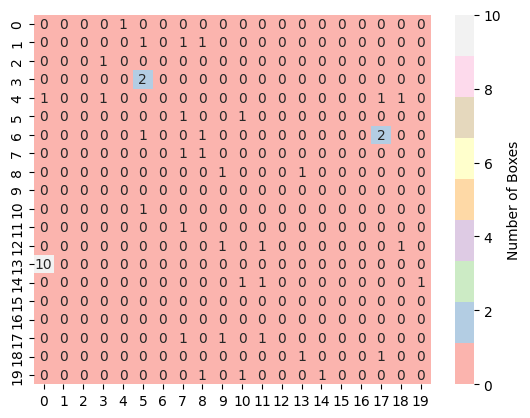

In [7]:
sns.heatmap(
    all_grids["Floor"].iloc[model.schedule.steps - 1],
    annot=True, 
    fmt="g", 
    cmap="Pastel1", 
    cbar_kws={"label": "Number of Boxes"}
)

plt.show()

In [ ]:
anim